In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('/content/drive/My Drive/DACON/data/ybigta_sdss_train.csv',)
test = pd.read_csv('/content/drive/My Drive/DACON/data/ybigta_sdss_test.csv',)
train.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,415567,QSO,106,19.20636,18.83202,18.79017,18.36788,18.32136,19.33958,18.72630,18.42127,18.05413,18.00387,18.06469,17.18273,16.74307,16.39772,16.28030,17.60089,16.82960,16.46197,16.09962,16.01179
1,733874,QSO,492,18.85419,18.60349,18.48284,18.36558,18.41101,19.17574,18.90761,18.79145,18.68332,18.75945,18.90764,18.64323,18.49622,18.38058,18.47802,18.84907,18.59603,18.46161,18.34665,18.40146
2,1009150,QSO,388,19.81733,18.67198,18.46566,18.33873,18.31073,20.17311,19.00520,18.82004,18.69565,18.66105,19.85916,18.70682,18.51968,18.37718,18.37598,19.81720,18.66244,18.45800,18.32918,18.31313
3,803041,QSO,531,21.77330,20.19641,20.08064,20.11380,19.83673,22.16908,20.56249,20.47989,20.49381,20.34039,21.38145,20.22594,20.13081,20.15601,20.04247,21.76902,20.18548,20.07931,20.10771,19.85110
4,432241,QSO,180,22.53572,20.07427,19.23110,18.94043,18.65541,22.82620,20.41057,19.56960,19.29224,18.98282,22.09349,20.14050,19.25699,18.98682,18.63438,22.58755,20.07051,19.21149,18.90649,18.63881


In [0]:
# #Sampling
# orb_type = [
#     "GALAXY",
#     "QSO",
#     "REDDEN_STD",
#     "ROSAT_D",
#     "SERENDIPITY_BLUE",
#     "SERENDIPITY_DISTANT",
#     "SERENDIPITY_FIRST",
#     "SERENDIPITY_MANUAL",
#     "SERENDIPITY_RED",
#     "SKY",
#     "SPECTROPHOTO_STD",
#     "STAR_BHB",
#     "STAR_BROWN_DWARF",
#     "STAR_CARBON",
#     "STAR_CATY_VAR",
#     "STAR_PN",
#     "STAR_RED_DWARF",
#     "STAR_SUB_DWARF",
#     "STAR_WHITE_DWARF"
# ]
# def sampling(df, orb_type): #df : 데이터프레임, orb_type : 천체타입 리스트
#     copy_train = df.copy()
#     for t in orb_type:
#         print("현재 type : ", t)
#         insert_row = int(input("랜덤샘플링으로 추가할 개수를 입력하세요 : "))
#         print("\n")
#         temp = df[df["type"]==t].sample(n = insert_row, replace=True)  #t는 tpye의 종류, replace = True 옵션을 줘야 개수가 더 많아도 샘플링 가능
#         copy_train = pd.concat([copy_train, temp], axis = 0) #row로 붙여넣기
#     return copy_train

In [0]:
# #타입별 개수 확인
# count = data.groupby("type").size().reset_index(name = "count")
# count

,type,count
0,GALAXY,34000
1,QSO,42500
2,REDDEN_STD,13052
3,ROSAT_D,5559
4,SERENDIPITY_BLUE,19439
5,SERENDIPITY_DISTANT,4163
6,SERENDIPITY_FIRST,5718
7,SERENDIPITY_MANUAL,46
8,SERENDIPITY_RED,1312
9,SKY,170


In [0]:
#data = sampling(data, ["STAR_PN", "SERENDIPITY_MANUAL", "SKY", "STAR_BROWN_DWARF"])

In [0]:
# #나누기
# X = data[data.columns[2:]]
# y = data['type']

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,106,19.20636,18.83202,18.79017,18.36788,18.32136,19.33958,18.72630,18.42127,18.05413,...,18.06469,17.18273,16.74307,16.39772,16.28030,17.60089,16.82960,16.46197,16.09962,16.01179
1,492,18.85419,18.60349,18.48284,18.36558,18.41101,19.17574,18.90761,18.79145,18.68332,...,18.90764,18.64323,18.49622,18.38058,18.47802,18.84907,18.59603,18.46161,18.34665,18.40146
2,388,19.81733,18.67198,18.46566,18.33873,18.31073,20.17311,19.00520,18.82004,18.69565,...,19.85916,18.70682,18.51968,18.37718,18.37598,19.81720,18.66244,18.45800,18.32918,18.31313
3,531,21.77330,20.19641,20.08064,20.11380,19.83673,22.16908,20.56249,20.47989,20.49381,...,21.38145,20.22594,20.13081,20.15601,20.04247,21.76902,20.18548,20.07931,20.10771,19.85110
4,180,22.53572,20.07427,19.23110,18.94043,18.65541,22.82620,20.41057,19.56960,19.29224,...,22.09349,20.14050,19.25699,18.98682,18.63438,22.58755,20.07051,19.21149,18.90649,18.63881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171960,433,19.87408,19.65214,19.23195,19.82903,19.17803,20.03255,19.79073,19.32966,19.88153,...,19.67697,19.38930,18.93779,19.42976,18.92334,19.61768,19.36602,18.90005,19.46094,18.87126
171961,222,19.56796,19.07706,19.31259,20.33882,22.82640,19.72872,19.19493,19.28195,20.08100,...,19.18864,17.84498,18.24092,19.43794,22.82680,19.34509,18.80491,18.99809,20.00117,22.82691
171962,364,21.02810,19.98788,19.66916,19.61703,19.45336,21.41619,20.30450,19.99014,19.95274,...,21.24201,20.06350,19.71670,19.64241,19.56509,21.05694,19.98696,19.66104,19.60821,19.44690
171963,439,19.87408,19.65214,19.23195,19.82903,19.17803,20.03255,19.79073,19.32966,19.88153,...,19.67697,19.38930,18.93779,19.42976,18.92334,19.61768,19.36602,18.90005,19.46094,18.87126


(22.5, -0.5)

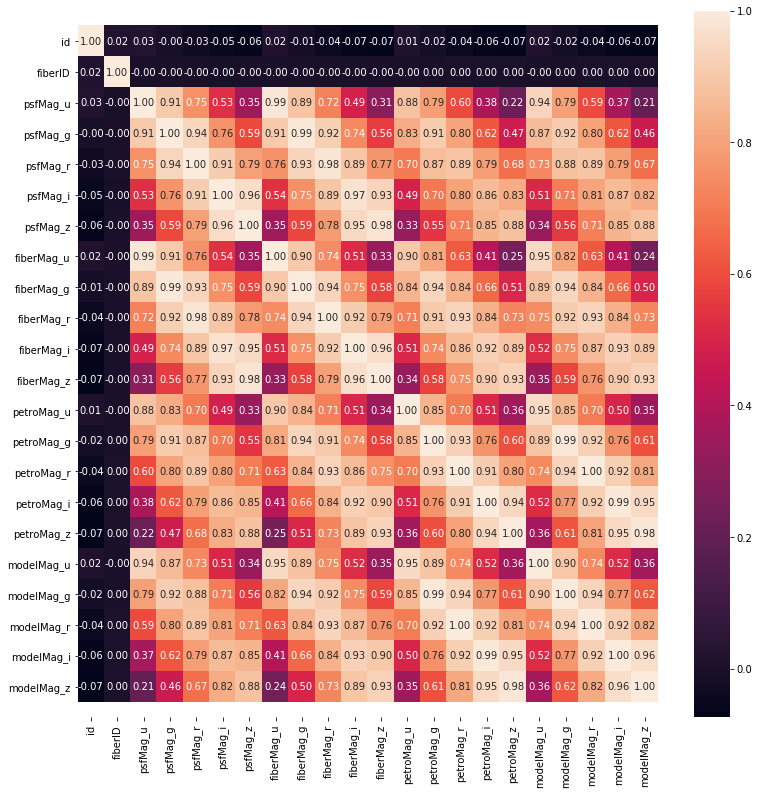

In [0]:
plt.subplots(figsize=(13,13))
ax = sns.heatmap(data=train.corr(),annot=True,fmt='.2f')
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)

In [10]:
psfMag_av = train.loc[:,['psfMag_u','psfMag_g','psfMag_r','psfMag_i']]
train['psfMag_av'] = psfMag_av.apply(np.mean,axis=1)
train = train.drop(['psfMag_u','psfMag_g','psfMag_r','psfMag_i'],axis=1)
fiberMag_av = train.loc[:,['fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i']]
train['fiberMag_av'] = fiberMag_av.apply(np.mean,axis=1)
train = train.drop(['fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i'],axis=1)
petroMag_av = train.loc[:,['petroMag_u','petroMag_g','petroMag_r','petroMag_i']]
train['petroMag_av'] = petroMag_av.apply(np.mean,axis=1)
train = train.drop(['petroMag_u','petroMag_g','petroMag_r','petroMag_i'],axis=1)
modelMag_av = train.loc[:,['modelMag_u','modelMag_g','modelMag_r','modelMag_i']]
train['modelMag_av'] = modelMag_av.apply(np.mean,axis=1)
train = train.drop(['modelMag_u','modelMag_g','modelMag_r','modelMag_i'],axis=1)
train.head()

,id,type,fiberID,psfMag_z,fiberMag_z,petroMag_z,modelMag_z,psfMag_av,fiberMag_av,petroMag_av,modelMag_av
0,415567,QSO,106,18.32136,18.00387,16.28030,16.01179,18.799108,18.635320,17.097052,16.748020
1,733874,QSO,492,18.41101,18.75945,18.47802,18.40146,18.576525,18.889530,18.606918,18.563340
2,1009150,QSO,388,18.31073,18.66105,18.37598,18.31313,18.823425,19.173500,18.865710,18.816705
3,803041,QSO,531,19.83673,20.34039,20.04247,19.85110,20.541037,20.926317,20.473553,20.535380
4,432241,QSO,180,18.65541,18.98282,18.63438,18.63881,20.195380,20.524653,20.119450,20.194010


In [12]:
X = train[train.columns[2:]]
y = train['type']
X.head()

,fiberID,psfMag_z,fiberMag_z,petroMag_z,modelMag_z,psfMag_av,fiberMag_av,petroMag_av,modelMag_av
0,106,18.32136,18.00387,16.28030,16.01179,18.799108,18.635320,17.097052,16.748020
1,492,18.41101,18.75945,18.47802,18.40146,18.576525,18.889530,18.606918,18.563340
2,388,18.31073,18.66105,18.37598,18.31313,18.823425,19.173500,18.865710,18.816705
3,531,19.83673,20.34039,20.04247,19.85110,20.541037,20.926317,20.473553,20.535380
4,180,18.65541,18.98282,18.63438,18.63881,20.195380,20.524653,20.119450,20.194010


In [0]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=128,
                                learning_rate=0.01, n_estimators=2000, max_depth=30,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)


In [14]:
lgbm_model.fit(X,y)

LGBMClassifier(bagging_fraction=0.9, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.01, max_depth=30,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=128, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
id_for_index = test['id']
test = test[test.columns[1:]]
test.head()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,182,18.81052,18.32911,17.90038,17.70225,17.65288,19.15704,18.62413,18.25862,18.05493,18.01230,18.85941,18.33458,17.93811,17.74766,17.68350,18.80268,18.32140,17.89795,17.69311,17.66096
1,207,22.99911,21.23738,19.89757,19.26474,19.88944,23.23582,21.56254,20.21074,19.59730,19.89939,22.60821,21.30784,19.90107,19.31741,19.59066,23.08329,21.22320,19.89089,19.25760,19.78871
2,496,18.91604,18.69714,18.59921,18.68769,18.63109,19.21263,18.99961,18.91325,19.00266,18.84462,18.92110,18.72866,18.63251,18.71346,18.47264,18.91443,18.68466,18.58225,18.67094,18.58222
3,441,19.22888,18.64079,18.68171,18.52602,18.22359,19.02119,18.28669,18.20239,17.98783,17.88705,17.71678,16.83449,16.67583,16.49454,16.33526,17.69108,16.90666,16.79139,16.57578,16.47379
4,320,19.57746,19.57045,19.23320,19.02790,18.62246,19.87532,19.80541,19.32947,19.08191,18.58683,19.15427,18.84896,18.01861,17.66363,17.29827,18.74826,18.57701,17.93407,17.64736,17.20101


In [16]:
psfMag_av = test.loc[:,['psfMag_u','psfMag_g','psfMag_r','psfMag_i']]
test['psfMag_av'] = psfMag_av.apply(np.mean,axis=1)
test = test.drop(['psfMag_u','psfMag_g','psfMag_r','psfMag_i'],axis=1)
fiberMag_av = test.loc[:,['fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i']]
test['fiberMag_av'] = fiberMag_av.apply(np.mean,axis=1)
test = test.drop(['fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i'],axis=1)
petroMag_av = test.loc[:,['petroMag_u','petroMag_g','petroMag_r','petroMag_i']]
test['petroMag_av'] = petroMag_av.apply(np.mean,axis=1)
test = test.drop(['petroMag_u','petroMag_g','petroMag_r','petroMag_i'],axis=1)
modelMag_av = test.loc[:,['modelMag_u','modelMag_g','modelMag_r','modelMag_i']]
test['modelMag_av'] = modelMag_av.apply(np.mean,axis=1)
test = test.drop(['modelMag_u','modelMag_g','modelMag_r','modelMag_i'],axis=1)
test.head()

,fiberID,psfMag_z,fiberMag_z,petroMag_z,modelMag_z,psfMag_av,fiberMag_av,petroMag_av,modelMag_av
0,182,17.65288,18.01230,17.68350,17.66096,18.185565,18.523680,18.219940,18.178785
1,207,19.88944,19.89939,19.59066,19.78871,20.849700,21.151600,20.783632,20.863745
2,496,18.63109,18.84462,18.47264,18.58222,18.725020,19.032038,18.748932,18.713070
3,441,18.22359,17.88705,16.33526,16.47379,18.769350,18.374525,16.930410,16.991228
4,320,18.62246,18.58683,17.29827,17.20101,19.352252,19.523027,18.421367,18.226675


In [0]:
predictions = lgbm_model.predict_proba(X = test)

In [18]:
result = pd.DataFrame(data=predictions, index=id_for_index, columns=lgbm_model.classes_)
result.head()
len(result)

30338

In [0]:
sample = pd.read_csv("/content/drive/My Drive/DACON/data/ybigta_sdss_sample_submission.csv")
col_order = sample.columns[1:]

In [21]:
result = result[col_order]
result.head()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
70379,0.000452,0.000033,4.610305e-07,3.766125e-06,0.780586,0.070717,0.000444,0.000242,0.126328,5.098572e-07,0.000006,0.020406,1.745918e-07,0.000035,0.000120,0.000006,3.289933e-06,3.728098e-07,0.000615
863365,0.000109,0.000017,1.053015e-06,9.065872e-06,0.000024,0.000092,0.000548,0.003304,0.668299,2.227930e-06,0.000009,0.133446,3.861072e-06,0.180026,0.000022,0.000010,2.072781e-06,4.692135e-06,0.014071
40381,0.002319,0.000146,3.621065e-07,1.511392e-06,0.000010,0.038034,0.000111,0.000838,0.921202,1.157025e-06,0.000004,0.009967,1.762061e-07,0.000046,0.000028,0.000008,5.078849e-07,3.694019e-07,0.027282
1322598,0.000084,0.000009,2.858220e-07,8.959316e-07,0.000207,0.000237,0.162373,0.000052,0.834553,3.545903e-07,0.000004,0.002307,1.370627e-07,0.000019,0.000013,0.000003,4.970957e-07,2.814662e-07,0.000137
1201659,0.000575,0.000094,8.783291e-07,2.584029e-06,0.000059,0.001494,0.066526,0.000204,0.890890,1.030135e-06,0.000009,0.036891,4.004397e-07,0.002706,0.000042,0.000013,1.204509e-06,5.941910e-07,0.000490


In [0]:
result.to_csv('/content/drive/My Drive/DACON/data/3rd_submission_rb_lgbm.csv', sep=',')